In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

sample_data = [
    ("Pen", 100, 1.5),
    ("Notebook", 50, 3.0),
    ("Pencil", 200, 0.5),
    ("Eraser", 150, 0.75)
]
cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
conn.commit()

In [2]:
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

In [3]:
import pandas as pd

df = pd.read_sql_query(query, conn)
print(df)

    product  total_qty  revenue
0    Eraser        300    225.0
1  Notebook        100    300.0
2       Pen        200    300.0
3    Pencil        400    200.0


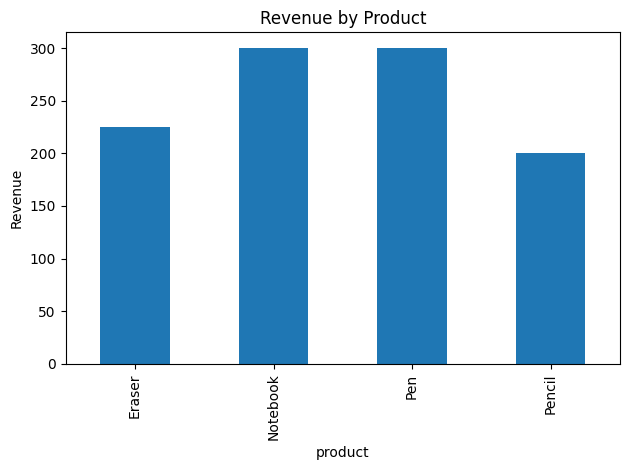

In [4]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png") 
plt.show()